In [31]:
import pandas as pd

from datetime import datetime

import spotipy
from credentials import client_id, client_secret
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

scope = 'user-library-read'
username = 'Christian Tirol'

user = '125065858'

In [32]:
df = pd.read_csv('HH-spotify_track_with_artist_info.csv')

In [33]:
df['artist_genres'] = pd.Series()

In [34]:
start = datetime.now()
counter = 0

for artist_id in df['artist_id'].unique():
    counter += 1
    if any(df.loc[df['artist_id'] == artist_id].artist_genres.isnull()):
        artist_info = sp.artist(artist_id)
        df.loc[df['artist_id'] == artist_id,'artist_popularity'] = artist_info['popularity']
        df.loc[df['artist_id'] == artist_id,'artist_followers'] = artist_info['followers']['total']
        df.loc[df['artist_id'] == artist_id,'artist_genres'] = ', '.join(artist_info['genres'])

        sec_elapsed = (datetime.now() - start).total_seconds()
        aps = counter / sec_elapsed
        artists_left = len(df.artist_id.unique()) - counter
        sec_left = artists_left / aps
        total_count = len(df.artist_id.unique())
    print(sec_elapsed,'seconds elapsed |',aps,'aps |',sec_left,'seconds remaining |',artists_left,'of',total_count,'remaining',end='\r')

In [35]:
df.to_csv('HH-spotify_track_with_genres.csv',index=False)

In [22]:
df = pd.read_csv('HH-spotify_track_with_genres.csv')

In [36]:
df.columns

Index(['playlist_id', 'playlist_name', 'playlist_uri', 'track_id',
       'track_name', 'track_artist', 'featured_artists', 'track_popularity',
       'track_uri', 'added_on', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'artist_id', 'artist_genres',
       'artist_popularity', 'artist_followers'],
      dtype='object')

In [37]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_artist,featured_artists,track_popularity,track_uri,added_on,...,id,uri,track_href,analysis_url,duration_ms,time_signature,artist_id,artist_genres,artist_popularity,artist_followers
0,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,22uZ8sPzkovoQG4Cu39Pqe,Big Pimpin',JAY Z,UGK,0,spotify:track:22uZ8sPzkovoQG4Cu39Pqe,2016-12-31T05:45:38Z,...,22uZ8sPzkovoQG4Cu39Pqe,spotify:track:22uZ8sPzkovoQG4Cu39Pqe,https://api.spotify.com/v1/tracks/22uZ8sPzkovo...,https://api.spotify.com/v1/audio-analysis/22uZ...,284640.0,4.0,3nFkdlSjzX9mRTtwJOzDYB,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709918.0
1,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,5Tl0HJvynZtKdSUMKbFVVX,Hard Knock Life (Ghetto Anthem),JAY Z,NaN,5,spotify:track:5Tl0HJvynZtKdSUMKbFVVX,2016-12-31T05:46:05Z,...,5Tl0HJvynZtKdSUMKbFVVX,spotify:track:5Tl0HJvynZtKdSUMKbFVVX,https://api.spotify.com/v1/tracks/5Tl0HJvynZtK...,https://api.spotify.com/v1/audio-analysis/5Tl0...,238467.0,4.0,3nFkdlSjzX9mRTtwJOzDYB,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709918.0
2,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,5MnXRG5LzgSzdpIkg5nagT,"Nigga What, Nigga Who (Originator 99)",JAY Z,Big Jaz,0,spotify:track:5MnXRG5LzgSzdpIkg5nagT,2016-12-31T05:46:11Z,...,5MnXRG5LzgSzdpIkg5nagT,spotify:track:5MnXRG5LzgSzdpIkg5nagT,https://api.spotify.com/v1/tracks/5MnXRG5LzgSz...,https://api.spotify.com/v1/audio-analysis/5MnX...,233173.0,4.0,3nFkdlSjzX9mRTtwJOzDYB,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709918.0
3,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,1FkgoPdajl8gwC1hlyvHtC,"Money, Cash, Hoes",JAY Z,DMX,0,spotify:track:1FkgoPdajl8gwC1hlyvHtC,2016-12-31T05:46:15Z,...,1FkgoPdajl8gwC1hlyvHtC,spotify:track:1FkgoPdajl8gwC1hlyvHtC,https://api.spotify.com/v1/tracks/1FkgoPdajl8g...,https://api.spotify.com/v1/audio-analysis/1Fkg...,286133.0,4.0,3nFkdlSjzX9mRTtwJOzDYB,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709918.0
4,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,4LGMSdeKOUoy5Wf75Je0Hl,Can I Get A...,JAY Z,"Amil, Ja Rule",2,spotify:track:4LGMSdeKOUoy5Wf75Je0Hl,2016-12-31T05:46:19Z,...,4LGMSdeKOUoy5Wf75Je0Hl,spotify:track:4LGMSdeKOUoy5Wf75Je0Hl,https://api.spotify.com/v1/tracks/4LGMSdeKOUoy...,https://api.spotify.com/v1/audio-analysis/4LGM...,309773.0,4.0,3nFkdlSjzX9mRTtwJOzDYB,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709918.0


When do I like to listen indie artists the most?

--- 

In [10]:
%matplotlib inline

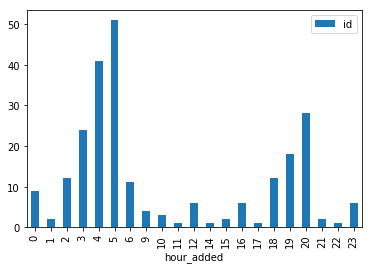

In [11]:
df[['hour_added','id']].groupby('hour_added').count().plot(kind='bar')

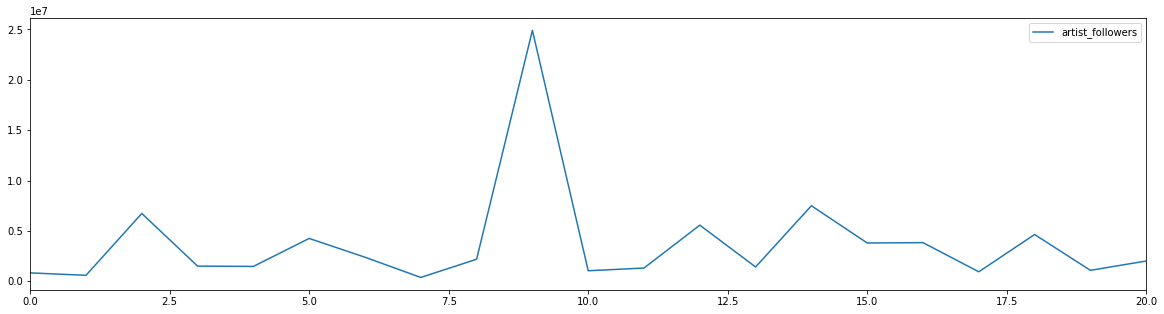

In [12]:
df[['hour_added','artist_followers']].groupby('hour_added').mean().reset_index().plot(
    kind='line',
    y='artist_followers',
    figsize=(20,5))

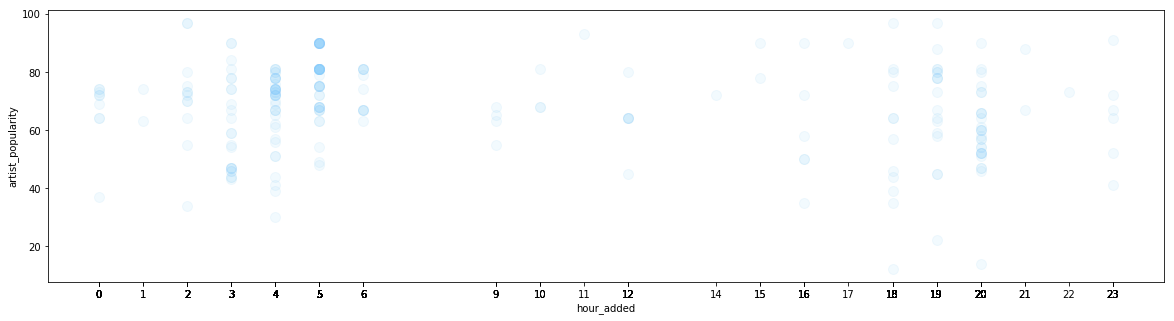

In [13]:
y = 'artist_popularity'
x = 'hour_added'
df[[x,y]].plot(
    kind='scatter',
    y=y,
    x=x,
    figsize=(20,5),
    alpha=.10,
    c='lightskyblue',
    s=100,
    xticks=df[x]
)

# Genre Analysis
---

In [25]:
df.columns

Index(['playlist_id', 'playlist_name', 'playlist_uri', 'track_id',
       'track_name', 'track_artist', 'featured_artists', 'track_popularity',
       'track_uri', 'added_on', 'artist_id', 'artist_genres',
       'artist_popularity', 'artist_followers'],
      dtype='object')

In [17]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_uri,added_on,danceability,energy,key,...,date_added,hour_added,day_added,month_added,artist_id,track_artist,featured_artists,artist_genres,artist_popularity,artist_followers
0,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,22uZ8sPzkovoQG4Cu39Pqe,Big Pimpin',spotify:track:22uZ8sPzkovoQG4Cu39Pqe,2016-12-31T05:45:38Z,0.880,0.816,11.0,...,2016-12-31,5,6,12,3nFkdlSjzX9mRTtwJOzDYB,JAY Z,UGK,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709906.0
1,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,5Tl0HJvynZtKdSUMKbFVVX,Hard Knock Life (Ghetto Anthem),spotify:track:5Tl0HJvynZtKdSUMKbFVVX,2016-12-31T05:46:05Z,0.883,0.659,10.0,...,2016-12-31,5,6,12,3nFkdlSjzX9mRTtwJOzDYB,JAY Z,NaN,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709906.0
2,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,5MnXRG5LzgSzdpIkg5nagT,"Nigga What, Nigga Who (Originator 99)",spotify:track:5MnXRG5LzgSzdpIkg5nagT,2016-12-31T05:46:11Z,0.862,0.614,11.0,...,2016-12-31,5,6,12,3nFkdlSjzX9mRTtwJOzDYB,JAY Z,Big Jaz,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709906.0
3,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,1FkgoPdajl8gwC1hlyvHtC,"Money, Cash, Hoes",spotify:track:1FkgoPdajl8gwC1hlyvHtC,2016-12-31T05:46:15Z,0.866,0.588,1.0,...,2016-12-31,5,6,12,3nFkdlSjzX9mRTtwJOzDYB,JAY Z,DMX,"bulgarian hip hop, east coast hip hop, gangste...",81.0,4709906.0
4,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,4LGMSdeKOUoy5Wf75Je0Hl,Can I Get A...,spotify:track:4LGMSdeKOUoy5Wf75Je0Hl,2016-12-31T05:46:19Z,0.863,0.700,8.0,...,2016-12-31,5,6,12,3nFkdlSjzX9mRTtwJOzDYB,JAY Z,"Amil, Ja Rule","bulgarian hip hop, east coast hip hop, gangste...",81.0,4709906.0
